In [ ]:
#Processing data from https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("T_ONTIME_REPORTING.csv")

df.fillna(0, inplace=True)

for i in range(len(df)):
  if(df.loc[i, "ORIGIN"] != "RDU"):
    df.loc[i, "ORIGIN"] = np.nan

df.dropna(inplace=True)

file_path = 'flights.csv'
df.to_csv(file_path, index=False)
print(f'Data exported to {file_path}')


Data exported to flights.csv


<ipython-input-40-124be73ec3e8>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["CARRIER"] = airlines
<ipython-input-40-124be73ec3e8>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["DEST_STATE"] = states


[('LATE_AIRCRAFT_DELAY', np.float64(0.2832129738173359)), ('NAS_DELAY', np.float64(0.2788206101140638)), ('CARRIER_DELAY', np.float64(0.2024028075647406)), ('CRS_ARR_TIME', np.float64(0.09415336819209674)), ('CRS_DEP_TIME', np.float64(0.07490254189566325)), ('CRS_ELAPSED_TIME', np.float64(0.05458197707733081)), ('ACTUAL_ELAPSED_TIME', np.float64(0.049960116005505206)), ('DEST_STATE', np.float64(0.03559847292379548)), ('DISTANCE', np.float64(0.0351392233872474)), ('DAY_OF_MONTH', np.float64(0.030444978006729073)), ('CARRIER', np.float64(0.025891612283770016)), ('DAY_OF_WEEK', np.float64(0.0146367768427913)), ('WEATHER_DELAY', np.float64(0.0)), ('SECURITY_DELAY', np.float64(0.0))]


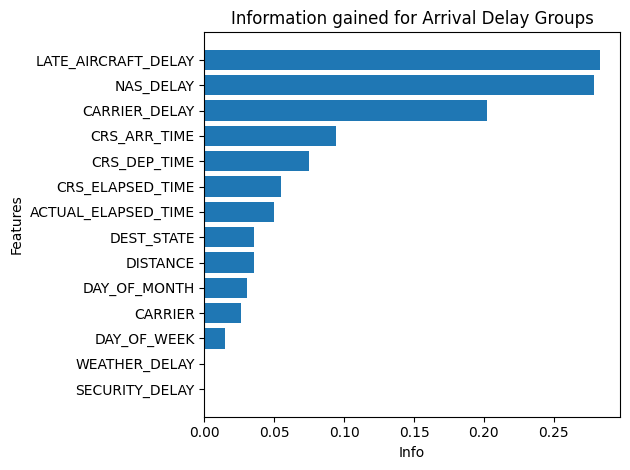

In [ ]:
#Feature selection using information gain
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression

df = pd.read_csv('flights.csv')

airlines = df["OP_UNIQUE_CARRIER"].tolist()
airlines_dict = {"DL": 1, "WN": 2, "AA": 3, "YX": 4, "UA": 5}
airlines = pd.Series(airlines).map(airlines_dict)
airlines.tolist()

airlines_count = pd.Series(df["OP_UNIQUE_CARRIER"]).value_counts()
airlines_by_count = airlines_count.index.tolist()
airlines_dict = {}
for i in range(len(airlines_by_count)):
    airlines_dict[airlines_by_count[i]] = i

airlines = df["OP_UNIQUE_CARRIER"].tolist()
airlines = pd.Series(airlines).map(airlines_dict)
airlines.tolist()

states_count = pd.Series(df["DEST_STATE_ABR"]).value_counts()
states_by_count = states_count.index.tolist()
states_dict = {}
for i in range(len(states_by_count)):
    states_dict[states_by_count[i]] = i

states = df["DEST_STATE_ABR"].tolist()
states = pd.Series(states).map(states_dict)
states.tolist()

y_name = ["ARR_DELAY_GROUP", "Arrival Delay Groups"]

X = df[["DAY_OF_MONTH", "DAY_OF_WEEK", "CRS_DEP_TIME", "CRS_ARR_TIME",
        "CRS_ELAPSED_TIME", "ACTUAL_ELAPSED_TIME", "DISTANCE", "CARRIER_DELAY", "WEATHER_DELAY", "NAS_DELAY",
        "SECURITY_DELAY", "LATE_AIRCRAFT_DELAY"]]
X["CARRIER"] = airlines
X["DEST_STATE"] = states

y = df["ARR_DELAY_GROUP"].tolist()

info_gain = mutual_info_regression(X,y)
X_info_gain = list(zip(X, info_gain))
X_info_gain_sorted = sorted(X_info_gain, key=lambda x: x[1], reverse=True)

X_sorted, info_gain_sorted = zip(*X_info_gain_sorted)
plt.barh(X_sorted, info_gain_sorted)
plt.title("Information gained for Arrival Delay Groups")
plt.xlabel("Info")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

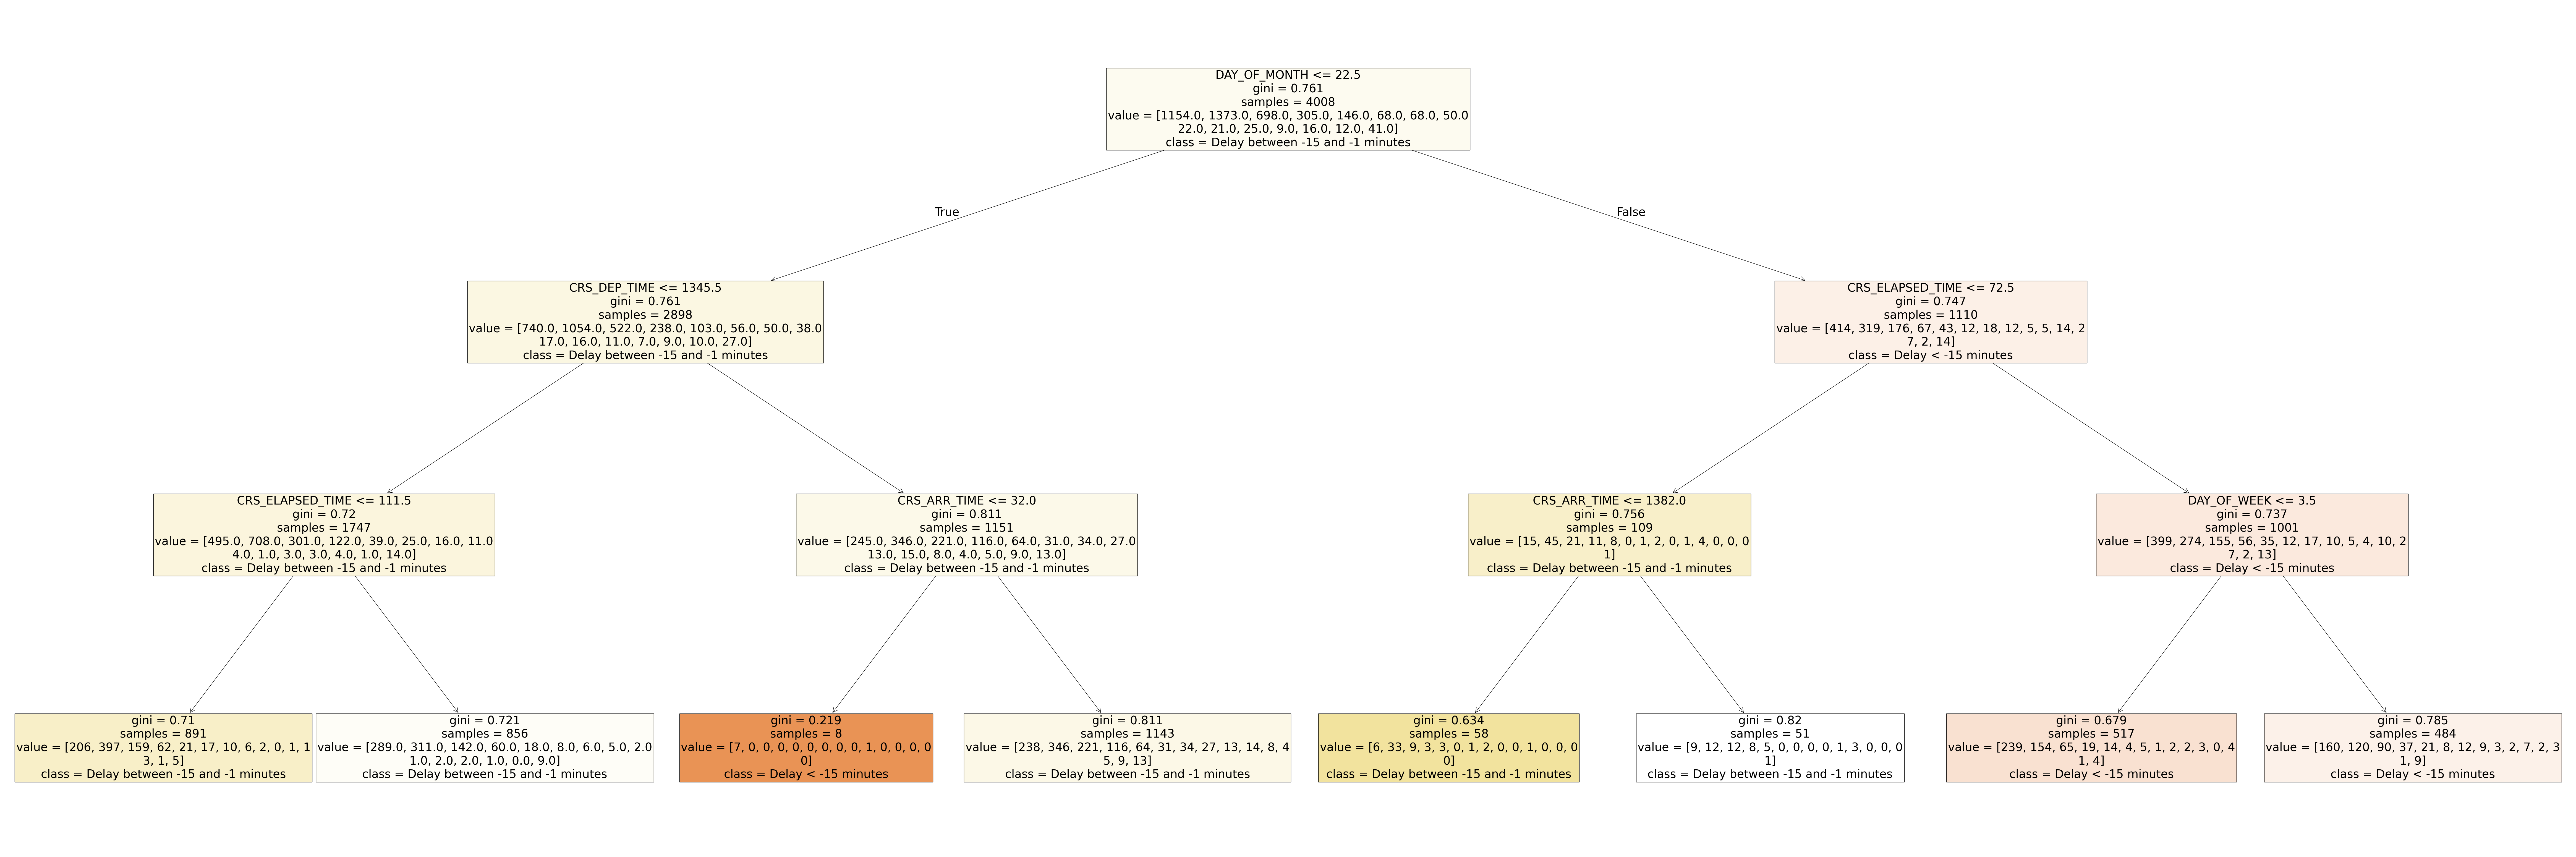

Accuracy:  0.3722554890219561


<Figure size 640x480 with 0 Axes>

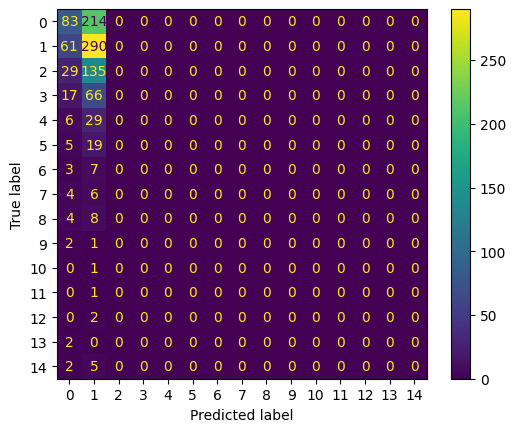

In [ ]:
#Creating the decision tree and displaying accuracy with confusion matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

df = pd.read_csv("flights.csv")

groups = pd.read_csv("L_ONTIME_DELAY_GROUPS.csv")
group_names = groups["Description"].tolist()

df.dropna(inplace=True)

X = df[["DAY_OF_MONTH",	"DAY_OF_WEEK", "CRS_DEP_TIME", "CRS_ARR_TIME", "CRS_ELAPSED_TIME"]]
y = df["ARR_DELAY_GROUP"].tolist()

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size = 0.8)

clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
predictions = pd.DataFrame({"Real Delays": y_test, "Predicted Delays": y_pred})
predictions

plt.figure(figsize=(120,40))
tree.plot_tree(clf, feature_names=X.columns, class_names = group_names, filled=True, fontsize=30)

plt.show()
plt.savefig('high_res_decision_tree.png', dpi=600)

print("Accuracy: ", accuracy_score(y_test, y_pred))

matrix = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()
plt.savefig("confusion_matrix.png", dpi=300)


AdaBoost accuracy:  0.33632734530938124
Random forest accuracy:  0.37624750499001997


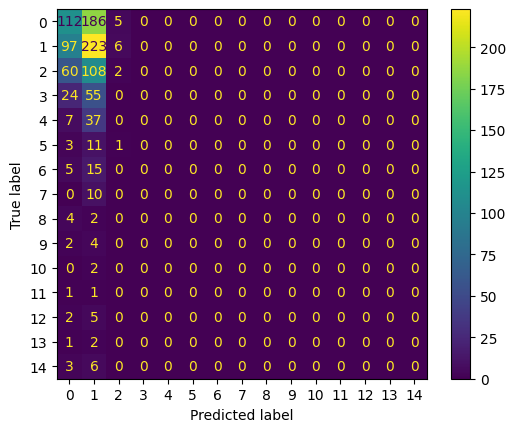

In [ ]:
#Using AdaBoost and Random Forest with confusion matrices to display accuracy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

df = pd.read_csv("flights.csv")
groups = pd.read_csv("L_ONTIME_DELAY_GROUPS.csv")
group_names = groups["Description"].tolist()

X = df[["DAY_OF_MONTH",	"DAY_OF_WEEK", "CRS_DEP_TIME", "CRS_ARR_TIME", "CRS_ELAPSED_TIME"]]
y = df["ARR_DELAY_GROUP"].tolist()

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size = 0.8)

tree = DecisionTreeClassifier(max_depth=1, random_state=42)
boost = AdaBoostClassifier(estimator=tree, n_estimators=50, learning_rate=1.0, random_state=42)
boost.fit(X_train, y_train)
boost_pred = boost.predict(X_test)
boost_acc = accuracy_score(y_test, boost_pred)

forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
forest_acc = accuracy_score(y_test, forest_pred)

matrix = confusion_matrix(y_test, boost_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()

print("AdaBoost accuracy: ", boost_acc)
print("Random forest accuracy: ", forest_acc)